<a href="https://colab.research.google.com/github/soulqan/Machine_Learning_2025/blob/main/UTS_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Soultan Mohammad Agnar Bisyarah (28)

NIM: 2341720191

Kelas: TI 3H

# Pre-Processing

**Tahap pra-pemrosesan adalah langkah fundamental untuk mengubah data mentah menjadi format yang bersih, terstruktur, dan siap untuk dianalisis. Tujuannya adalah untuk memastikan data yang digunakan oleh model machine learning berkualitas tinggi, sehingga hasil yang didapatkan akurat dan dapat diandalkan.**

In [ ]:
!pip install annoy

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551520 sha256=50f3569f1629a0730869d3fda024c546c6746f457f4474f7ceedf0045d5ae04d
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Menggunakan kaggle.json untuk menghubungkan ke kaggle`

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soultanmohammadab","key":"a2276767643510016b46723eb5a44171"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/houseprice

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 651MB/s]
Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/houseprice/data_description.txt  
  inflating: /content/houseprice/sample_submission.csv  
  inflating: /content/houseprice/test.csv  
  inflating: /content/houseprice/train.csv  


mengambil data dan menampilkan data info

In [130]:
df = pd.read_csv('/content/houseprice/train.csv')

print("Ukuran dataset:", df.shape)
df.info()

Ukuran dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

Mengambil fitur numerik dan menampilkan data

In [131]:
num_df = df.select_dtypes(include=['float64', 'int64'])
print("Jumlah fitur numerik:", num_df.shape[1])

num_df.head()


Jumlah fitur numerik: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Melihat data dat yang hilang (yang memiliki null value)

In [119]:
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**A. Penanganan Missing Values
Langkah pertama adalah menangani nilai yang hilang. Strategi yang digunakan disesuaikan dengan karakteristik setiap fitur untuk menjaga integritas data.**

**Eliminasi Fitur: Fitur yang memiliki data kosong lebih dari 60% (Alley, PoolQC, Fence, MiscFeature) dihapus sepenuhnya. Fitur-fitur ini dianggap tidak memberikan informasi yang cukup signifikan dan sulit untuk diisi secara akurat.**

**Imputasi Kontekstual (Kategorikal): Untuk fitur-fitur seperti BsmtQual, GarageType, atau FireplaceQu, nilai kosong (NaN) tidak berarti datanya hilang, melainkan rumah tersebut tidak memiliki fitur tersebut (misalnya, tidak punya garasi atau perapian). Oleh karena itu, nilai kosong ini diisi dengan string "None". Untuk fitur kategorikal lainnya, nilai kosong diisi dengan modus (nilai yang paling sering muncul).**

**Imputasi Logis (Numerik): Fitur numerik seperti LotFrontage dan GarageYrBlt diisi dengan nilai median untuk menghindari pengaruh dari nilai ekstrem (outliers). Sisa fitur numerik lainnya yang memiliki nilai kosong diisi dengan 0.**

In [132]:
## A. Handle Missing Values
print("\n--- Memulai Proses Penanganan Missing Values ---")

# Drop fitur dengan persentase null > 60%
cols_to_drop_na = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns=cols_to_drop_na, inplace=True)
print(f"Kolom yang di-drop (>60% null): {cols_to_drop_na}")

# Imputasi Kolom Kategorikal
print("\nImputasi kolom kategorikal...")
cols_fill_none = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'GarageType', 'GarageFinish', 'GarageQual', 'FireplaceQu', 'GarageCond'
]
df[cols_fill_none] = df[cols_fill_none].fillna('None')
print(f"Kolom diisi 'None': {len(cols_fill_none)} kolom")

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
print("Sisa kolom kategorikal diisi dengan modus.")

# Imputasi Kolom Numerik
print("\nImputasi kolom numerik...")
df['LotFrontage'] = df['LotFrontage'].fillna(df["LotFrontage"].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df["GarageYrBlt"].median())
# Isi sisa missing values numerik (jika ada) dengan 0
df.fillna(0, inplace=True)
print("Kolom numerik 'LotFrontage' & 'GarageYrBlt' diisi median, sisanya diisi 0.")
print("\nPenanganan missing values selesai. Tidak ada nilai null tersisa.")
print(f"Jumlah null values sekarang: {df.isnull().sum().sum()}")





--- Memulai Proses Penanganan Missing Values ---
Kolom yang di-drop (>60% null): ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

Imputasi kolom kategorikal...
Kolom diisi 'None': 10 kolom
Sisa kolom kategorikal diisi dengan modus.

Imputasi kolom numerik...
Kolom numerik 'LotFrontage' & 'GarageYrBlt' diisi median, sisanya diisi 0.

Penanganan missing values selesai. Tidak ada nilai null tersisa.
Jumlah null values sekarang: 0


**B. Encoding Fitur Kategorikal
Algoritma machine learning hanya dapat memproses data numerik. Oleh karena itu, semua fitur yang masih berbentuk teks (kategorikal) harus diubah menjadi angka melalui proses encoding.**

**Ordinal Encoding: Metode ini digunakan untuk fitur yang kategorinya memiliki tingkatan atau urutan yang jelas. Contohnya adalah fitur kualitas seperti ExterQual, di mana kategori seperti 'Excellent', 'Good', dan 'Fair' diubah menjadi angka (misal: 5, 4, 3). Ini memastikan informasi peringkat tetap terjaga.**

**One-Hot Encoding: Metode ini digunakan untuk fitur yang kategorinya tidak memiliki urutan atau peringkat (nominal), seperti Neighborhood. Teknik ini membuat kolom biner (0 atau 1) baru untuk setiap kategori. Hal ini mencegah model membuat asumsi yang salah bahwa satu kategori secara numerik lebih tinggi dari yang lain.**

In [133]:
## B. Encoding Fitur Kategorikal
print("\n--- Memulai Proses Encoding Fitur ---")

# Ordinal Encoding
print("Menerapkan Ordinal Encoding...")
qual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
qual_map_na = {'None': 0, **qual_map}
df['ExterQual'] = df['ExterQual'].map(qual_map)
df['ExterCond'] = df['ExterCond'].map(qual_map)
df['BsmtQual'] = df['BsmtQual'].map(qual_map_na)
df['BsmtCond'] = df['BsmtCond'].map(qual_map_na)
df['HeatingQC'] = df['HeatingQC'].map(qual_map)
df['KitchenQual'] = df['KitchenQual'].map(qual_map)
df['FireplaceQu'] = df['FireplaceQu'].map(qual_map_na)
df['GarageQual'] = df['GarageQual'].map(qual_map_na)
df['GarageCond'] = df['GarageCond'].map(qual_map_na)
# Tambahkan pemetaan lain dari referensi Anda jika diperlukan
df['CentralAir'] = df['CentralAir'].map({'N': 0, 'Y': 1})
df['PavedDrive'] = df['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})


# One-Hot Encoding
print("Menerapkan One-Hot Encoding...")
nominal_cols = [
    'MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'Heating', 'GarageType',
    'SaleType', 'SaleCondition', 'Condition1', 'Condition2', 'Neighborhood'
]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print("Proses Encoding selesai.")



--- Memulai Proses Encoding Fitur ---
Menerapkan Ordinal Encoding...
Menerapkan One-Hot Encoding...
Proses Encoding selesai.


**c. Rekayasa Fitur
Sesuai dengan instruksi tugas, sebuah fitur baru dibuat untuk meningkatkan kualitas analisis.**


**Pembuatan Fitur TotalArea: Fitur baru TotalArea dibuat dengan menjumlahkan fitur GrLivArea dan TotalBsmtSF. Tujuannya adalah untuk menciptakan satu variabel tunggal yang lebih komprehensif dalam merepresentasikan total luas hunian sebuah rumah.**

In [135]:
num_df['TotalArea'] = num_df['GrLivArea'] + num_df['TotalBsmtSF']

num_df[['GrLivArea', 'TotalBsmtSF', 'TotalArea']].head()

,GrLivArea,TotalBsmtSF,TotalArea
0,1710,856,2566
1,1262,1262,2524
2,1786,920,2706
3,1717,756,2473
4,2198,1145,3343


**D. Normalisasi Data adalah normalisasi data menggunakan StandardScaler.**

**Tujuan Normalisasi: Algoritma berbasis jarak seperti K-Means sangat sensitif terhadap skala fitur. Fitur dengan rentang nilai besar (misalnya, TotalArea) dapat mendominasi proses perhitungan jarak dibandingkan fitur dengan rentang kecil (misalnya, FullBath).**

**Proses: StandardScaler mengubah distribusi setiap fitur sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini memastikan semua fitur memiliki skala yang sebanding dan memberikan kontribusi yang setara dalam proses clustering.**

In [136]:
## D. Normalisasi
print("\n--- Normalisasi Data ---")
# Drop kolom non-numerik yang mungkin tersisa dan kolom target/ID
X = df.drop(columns=['Id', 'SalePrice'], errors='ignore')

# Pastikan semua kolom numerik untuk scaling
X = X.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data siap untuk clustering dengan shape: {X_scaled.shape}")


--- Normalisasi Data ---
Data siap untuk clustering dengan shape: (1460, 47)


# Clustering

**Proses Clustering**

**Setelah data berhasil diproses, data yang sudah bersih dan ternormalisasi (X_scaled) siap digunakan untuk tahap selanjutnya, yaitu penerapan algoritma clustering K-Means dan DBSCAN. Data ini akan digunakan untuk menemukan pola dan mengelompokkan rumah-rumah dengan karakteristik serupa, yang kemudian hasilnya akan dievaluasi menggunakan metrik Silhouette Score dan Davies-Bouldin Index**

--- Menghitung Inertia untuk Setiap Nilai K ---
Inertia untuk k=2: 58967.86
Inertia untuk k=3: 55432.66
Inertia untuk k=4: 53058.96
Inertia untuk k=5: 51006.86
Inertia untuk k=6: 49402.12
Inertia untuk k=7: 48181.23
Inertia untuk k=8: 47063.01
Inertia untuk k=9: 45861.48
Inertia untuk k=10: 44663.73

--- Membuat Visualisasi Elbow Method ---


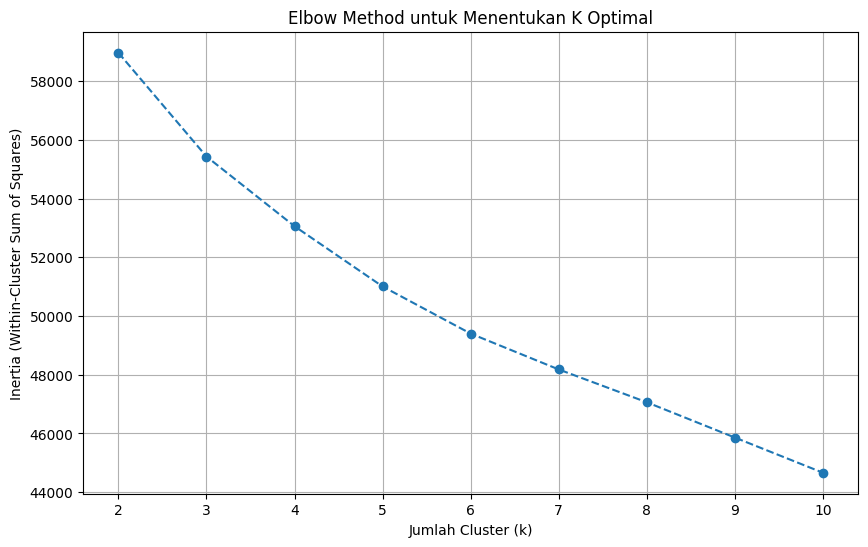

In [141]:
inertia = []

# Tentukan rentang jumlah cluster (k) yang ingin diuji, misalnya dari 2 sampai 10
k_range = range(2, 11)

print("--- Menghitung Inertia untuk Setiap Nilai K ---")
for k in k_range:
    # Buat model KMeans untuk setiap nilai k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Latih model
    kmeans.fit(X_scaled)
    # Simpan nilai inertia-nya
    inertia.append(kmeans.inertia_)
    print(f"Inertia untuk k={k}: {kmeans.inertia_:.2f}")

# --- Membuat Plot Elbow Method ---
print("\n--- Membuat Visualisasi Elbow Method ---")
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

**Kmeans**

In [140]:
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
print("K-Means clustering selesai.")

K-Means clustering selesai.


**DBSCAN**

In [124]:
# DBSCAN (parameter eps mungkin perlu disesuaikan)
dbscan = DBSCAN(eps=10, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"DBSCAN clustering selesai. Ditemukan {n_clusters_dbscan} cluster.")

DBSCAN clustering selesai. Ditemukan 1 cluster.


**Perbandingan Hasil**

**K-MEANS**

**Silhouette Score (0.084): Skor ini positif, namun sangat rendah.**

Artinya: Model K-Means berhasil membuat kelompok di mana, rata-rata, setiap rumah lebih mirip dengan anggota kelompoknya sendiri daripada anggota kelompok lain. Namun, karena nilainya sangat dekat dengan 0, ini menandakan kelompok-kelompok tersebut sangat tumpang tindih (overlapping) dan batas antar kelompoknya tidak jelas.



**Davies-Bouldin Index (2.411): Skor ini cukup tinggi (semakin rendah semakin baik).**

Artinya: Ini mengonfirmasi temuan dari Silhouette Score. Nilai yang jauh dari 0 menunjukkan bahwa cluster yang terbentuk tidak padat (anggotanya tersebar) dan/atau tidak terpisah jauh satu sama lain.

**DBSCAN**

Skor -1.0 bukanlah skor evaluasi kualitas, melainkan sebuah indikator teknis bahwa DBSCAN gagal menemukan lebih dari satu cluster.

DBSCAN bekerja berdasarkan kepadatan data. Dengan parameter (eps dan min_samples) yang digunakan, algoritma tidak dapat menemukan area yang cukup "padat" untuk dianggap sebagai sebuah cluster. Kemungkinan besar, DBSCAN mengklasifikasikan semua titik data sebagai noise (diberi label -1).

Karena metrik evaluasi tidak dapat dihitung jika hanya ada satu (atau tidak ada) cluster, kode mengembalikan nilai default -1 yang telah diatur sebelumnya. Kegagalan ini sering terjadi pada data berdimensi sangat tinggi (setelah One-Hot Encoding), di mana jarak antar titik data menjadi sangat besar.

In [125]:
# --- 4. Evaluasi Hasil Clustering ---
print("\n--- Hasil Evaluasi Clustering ---")
# Evaluasi K-Means
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
dbi_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

# Evaluasi DBSCAN
if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    dbi_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)
else:
    silhouette_dbscan, dbi_dbscan = -1, -1 # Nilai default jika cluster < 2

# Tampilkan dalam tabel
hasil_evaluasi = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan],
    'Davies-Bouldin Index': [dbi_kmeans, dbi_dbscan]
}).set_index('Model')

print(hasil_evaluasi)


--- Hasil Evaluasi Clustering ---
         Silhouette Score  Davies-Bouldin Index
Model                                          
K-Means          0.084853               2.41134
DBSCAN          -1.000000              -1.00000


**visualisasi**


--- Membuat Visualisasi Clustering ---


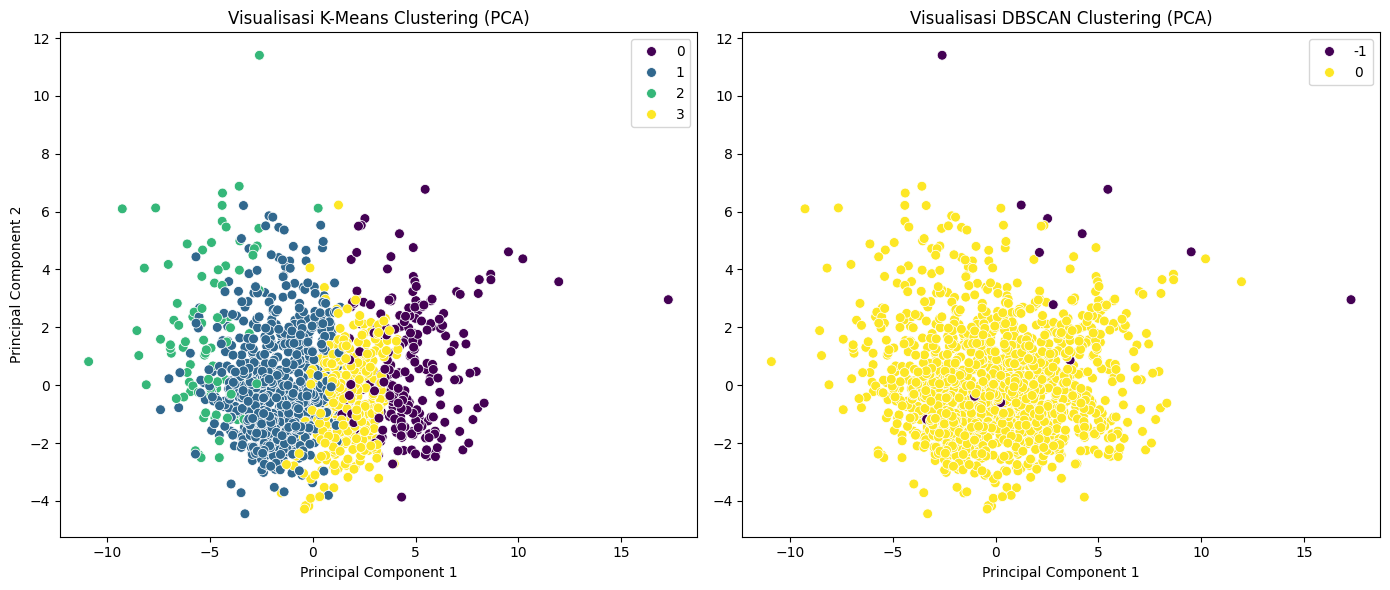

In [126]:
# --- 5. Visualisasi Clustering (2D) ---
print("\n--- Membuat Visualisasi Clustering ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

# Plot K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='viridis', legend='full', s=50)
plt.title('Visualisasi K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='viridis', legend='full', s=50)
plt.title('Visualisasi DBSCAN Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('')
plt.tight_layout()
plt.show()

**ANN**

**ANN digunakan dalah menemukan "tetangga terdekat" dari sebuah titik data (dalam kasus ini, sebuah rumah) dengan sangat efisien. Daripada membandingkan satu rumah dengan ribuan rumah lainnya satu per satu (metode brute-force), Annoy menggunakan indeks pintar untuk langsung menuju ke area data yang paling relevan, sehingga prosesnya jauh lebih cepat.**

In [128]:
print("\n--- Mencari Tetangga Terdekat dengan Annoy ---")

# Bangun indeks Annoy
dim = X_scaled.shape[1]
ann_index = AnnoyIndex(dim, 'euclidean')
for i in range(len(X_scaled)):
    ann_index.add_item(i, X_scaled[i])
ann_index.build(10) # 10 adalah jumlah pohon
print("Indeks Annoy berhasil dibangun.")

# Pilih 4 titik query secara acak
query_points_indices = np.random.choice(len(X_scaled), size=4, replace=False)

# Cari tetangga terdekat
for query_idx in query_points_indices:
    neighbors, distances = ann_index.get_nns_by_item(query_idx, 6, include_distances=True) # Cari 6 agar bisa skip diri sendiri

    print("\n" + "="*50)
    print(f"Query Point Index: {query_idx} (Cluster KMeans: {labels_kmeans[query_idx]})")
    print("="*50)
    print("Tetangga Terdekat dan Jaraknya:")
    for n, d in zip(neighbors, distances):
        if n != query_idx:
            print(f"  - Tetangga Index: {n:4d} | Jarak: {d:.4f} | Cluster (KMeans): {labels_kmeans[n]}")


--- Mencari Tetangga Terdekat dengan Annoy ---
Indeks Annoy berhasil dibangun.

Query Point Index: 748 (Cluster KMeans: 0)
Tetangga Terdekat dan Jaraknya:
  - Tetangga Index: 1016 | Jarak: 3.4085 | Cluster (KMeans): 3
  - Tetangga Index:  476 | Jarak: 3.9337 | Cluster (KMeans): 3
  - Tetangga Index:  257 | Jarak: 4.1773 | Cluster (KMeans): 0
  - Tetangga Index:  216 | Jarak: 4.2127 | Cluster (KMeans): 3
  - Tetangga Index: 1027 | Jarak: 4.2838 | Cluster (KMeans): 0

Query Point Index: 452 (Cluster KMeans: 3)
Tetangga Terdekat dan Jaraknya:
  - Tetangga Index: 1338 | Jarak: 2.7239 | Cluster (KMeans): 3
  - Tetangga Index: 1366 | Jarak: 2.7514 | Cluster (KMeans): 3
  - Tetangga Index:  518 | Jarak: 2.8914 | Cluster (KMeans): 3
  - Tetangga Index: 1240 | Jarak: 3.0809 | Cluster (KMeans): 3
  - Tetangga Index:  469 | Jarak: 3.1661 | Cluster (KMeans): 3

Query Point Index: 828 (Cluster KMeans: 1)
Tetangga Terdekat dan Jaraknya:
  - Tetangga Index:  504 | Jarak: 7.1993 | Cluster (KMeans): 1

**Kesimpulan:**


K-Means lebih unggul dalam kasus ini karena menjadi satu-satunya yang mampu menghasilkan hasil yang dapat dievaluasi.

Dataset House Prices secara fundamental tidak cocok untuk di-cluster dengan baik. Hal ini dibuktikan oleh skor K-Means yang konsisten rendah dan kegagalan total DBSCAN dalam menemukan struktur berbasis kepadatan.